In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = sns.load_dataset('tips')

In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [6]:
df.duplicated().sum()

1

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(243, 7)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,243.0,19.813868,8.910071,3.07,13.38,17.81,24.175,50.81
tip,243.0,3.002387,1.385002,1.00,2.00,2.92,3.575,10.00
size,243.0,2.572016,0.952356,1.00,2.00,2.00,3.000,6.00


In [10]:
from sklearn.model_selection import train_test_split   # dividing data into training and for testing 
from sklearn.preprocessing import LabelEncoder   #convert categorical into int
from sklearn.impute import SimpleImputer    #handaling missing values
from sklearn.pipeline import Pipeline   #for automation
from sklearn.preprocessing import StandardScaler       #standardizig
from sklearn.preprocessing import OneHotEncoder #convert categorical to numerical
from sklearn.compose import ColumnTransformer   #differnt preprocessing steps to different columns
from sklearn.ensemble import RandomForestRegressor  #algorithms or Model
from sklearn.linear_model import LinearRegression   #algorithms or Model
from sklearn.tree import DecisionTreeRegressor  #algorithms or Model
from sklearn.metrics import mean_squared_error, r2_score    #To check performance of model
from sklearn.neighbors import KNeighborsRegressor   #algorithms or models
from sklearn.model_selection import GridSearchCV   #for hyperpyrameter tuning


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  243 non-null    float64 
 1   tip         243 non-null    float64 
 2   sex         243 non-null    category
 3   smoker      243 non-null    category
 4   day         243 non-null    category
 5   time        243 non-null    category
 6   size        243 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 9.1 KB


In [12]:
categorical_col = ['sex', 'smoker', 'day', 'time']
numerical_col = ['tip', 'size']

In [13]:
# Feature engeniring automation 
# numerical Pipeline 
num_pipeline = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='median')),  #Handaling missing values
    ('scaler', StandardScaler())    #feature scaling
])

# categorical Pipeline 
cat_pipeline = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('oneHotEncoder', OneHotEncoder(handle_unknown='ignore'))
])

In [14]:
# combine into column transfer 
preprocessor = ColumnTransformer([
    ('num', num_pipeline, numerical_col),
    ('catego', cat_pipeline, categorical_col)
])

In [15]:
#Define models and hyperparameter grids
models = {
    'Linear Regression': {
        'model': LinearRegression(),
        'params': {}
        },
    'Random Forest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'regressor__n_estimators': [50,100,150],
            'regressor__max_depth':[None, 5, 10],
            'regressor__min_samples_split': [2, 5]
        }
    },
    'Decision Tree': {
        'model' : DecisionTreeRegressor(random_state=42),
        'params': {
            'regressor__max_depth': [None, 5, 10],
            'regressor__min_samples_split': [2,5]
        }
    },
   
    
}

In [16]:
# Features and target 
X = df.drop('total_bill', axis=1)
y = df['total_bill']

In [17]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
results = {}

for name, config in models.items():
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', config['model'])
    ])

    grid = GridSearchCV(pipe, config['params'], cv=5, scoring='r2', n_jobs=-1)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)


    results[name] = {
        'Best Params': grid.best_params_,
        'R2 score': r2,
        'MSE':mse
    }

In [22]:
#Print results
print('Model performance comparision:\n')
for name, score in results.items():
    print(f"{name: <20} --> R2 score: {score['R2 score']:.4f}, MSE:{score['MSE']:.4f}")
    print(f"Best Params: {score['Best Params']}")

Model performance comparision:

Linear Regression    --> R2 score: 0.6190, MSE:34.2715
Best Params: {}
Random Forest        --> R2 score: 0.5759, MSE:38.1489
Best Params: {'regressor__max_depth': 5, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 50}
Decision Tree        --> R2 score: 0.5580, MSE:39.7564
Best Params: {'regressor__max_depth': 5, 'regressor__min_samples_split': 2}


In [20]:
results_df = pd.DataFrame(results).T
results_df

,Best Params,R2 score,MSE
Linear Regression,{},0.618962,34.27149
Random Forest,"{'regressor__max_depth': 5, 'regressor__min_sa...",0.575853,38.14886
Decision Tree,"{'regressor__max_depth': 5, 'regressor__min_sa...",0.55798,39.756354


In [33]:
# Sort by r2 in descending order 
results_df_sorted = results_df.sort_values(by='R2 score', ascending=False)
results_df_sorted

,Best Params,R2 score,MSE
Linear Regression,{},0.618962,34.27149
Random Forest,"{'regressor__max_depth': 5, 'regressor__min_sa...",0.575853,38.14886
Decision Tree,"{'regressor__max_depth': 5, 'regressor__min_sa...",0.55798,39.756354


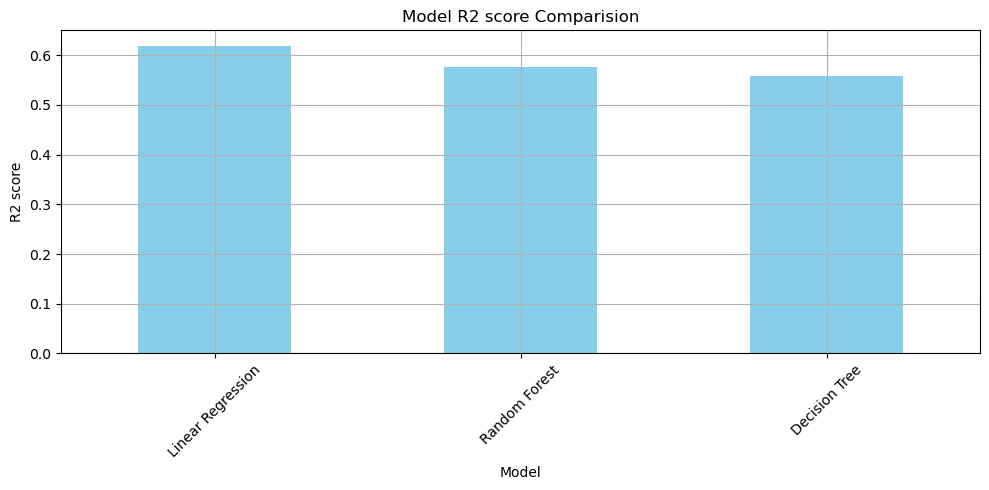

In [35]:
results_df_sorted['R2 score'].plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title('Model R2 score Comparision')
plt.xlabel('Model')
plt.ylabel('R2 score')
plt.xticks(rotation = 45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [48]:
# Showcasing the actual and prdicted in dataframe 
comparision_df = pd.DataFrame({
    'Actual': y_test,
    'predicted': y_pred
})
comparision_df.sort_index(ascending=True)

,Actual,predicted
6,8.77,13.463953
9,14.78,18.225000
10,10.27,13.463953
15,21.58,18.225000
16,10.33,14.490000
18,16.97,22.366250
19,20.65,22.366250
24,19.82,18.225000
25,17.81,19.351250
30,9.55,13.463953


In [45]:
best_model_name = max(results, key=lambda x: results[x]['R2 score'])
best_model_params = results[best_model_name]['Best Params']
best_model_name

'Linear Regression'

In [46]:
y_pred.mean()

19.78419328994056

In [47]:
y_test.mean()

18.925714285714285